# Final Project Report: Is age of a player a good predictor for total played hours?
Group 007-2 Sohan Sadeque, Io Santiago, Maggie Tu, Fangfei Zhu

### Introduction:
PLAICraft is a project run by the PLAI (Pacific Laboratory for Artificial Intelligence) group at UBC’s Computer Science Department. Through this project, participants are able to play *Minecraft* for free on their browser on a shared server world where data such as audio, key presses, mouse inputs, and video footage is collected from players to train an Artificial Intelligence model. 
Our group first chose a broad question that we wanted to answer using datasets from this project. We ended up choosing: <br>

**Which ‘kinds’ of players are most likely to contribute a large amount of data?** <br>

To answer this broad question, we had to narrow it down and make it more specific. We decided that we can use ‘total played hours’ as a metric for the amount of data contributed and that age would be an interesting variable to correlate it with. Therefore, this report will focus on answering the following specific question: <br>

**Can age predict the total played hours for participants?** <br>

To answer this question, we were provided with two datasets: ‘players.csv’ and ‘sessions.csv’. <br>
The players.csv dataset includes data on the PLAICraft players themselves, totalling 196 observations and 7 variables including: <br>
<ol>
    <li>
        experience: The player’s prior experience with *Minecraft*
    </li>
    <li>
        subscribe: Whether the player is subscribed to the PLAICraft mailing list
    </li>
    <li>
        hashedEmail: The player’s encrypted email
    </li>
    <li>
        played_hours: The player’s total hours on the PLAICraft server
    </li>
    <li>
        name: The player’s first name
    </li>
    <li>
        gender: The player’s gender
    </li>
    <li>
        Age: The player’s age
    </li>
</ol>
The second dataset, sessions.csv, includes data on PLAICraft sessions. It totals 1,535 observations, each representing an individual player’s play session on the server. The dataset includes 5 variables:
<ol>
    <li>
        hashedEmail: The player’s encrypted email
    </li>
    <li>
        start_time: The play session’s start time including date, month, year, and time in 24-hour clock format
    </li>
    <li>
        end_time: The play session’s end time including date, month, year, and time in 24-hour clock format
    </li>
    <li>
        original_start_time: The play session’s start time in a different format.
    </li>
    <li>
        original_end_time: The play session’s end time in a different format.
    </li>
</ol>
Our methods will focus on using the <b>players.csv</b> dataset to answer our question.

### Methods & Results:

#### loads data 

In [40]:
library(tidyverse)
library(repr)
library(ggplot2)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [41]:
players <- read_csv("https://raw.githubusercontent.com/maggiettu/dsci100-group-project/refs/heads/main/players.csv")
players
summary(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

### Wrangling and Cleaning the Dataset

In [42]:
players_select <- players |>
        select(played_hours,Age)
players_select

played_hours,Age
<dbl>,<dbl>
30.3,9
3.8,17
0.0,17
⋮,⋮
0.0,17
2.3,17
0.2,NA


In [53]:
players_clean <- players_select |>
rename(age = Age) |>
drop_na()

In [54]:
players_mean <- players_clean |>
        summarize(
            mean_played_hours = mean(played_hours),
            mean_age = mean(age, na.rm = TRUE))

players_mean

mean_played_hours,mean_age
<dbl>,<dbl>
5.904639,20.52062


### Summary of the data

| Maximum played hours | Minimum played hours|Mean played hours|
|:--------:| :-------: | :-------: |
| 223.100 |  0.000  |5.846| 

|Maximum Age| Minimum Age| Mean Age|
|:--------:| :-------: | :-------: |
|50.00|8.00|20.52|


### Visualization of the dataset

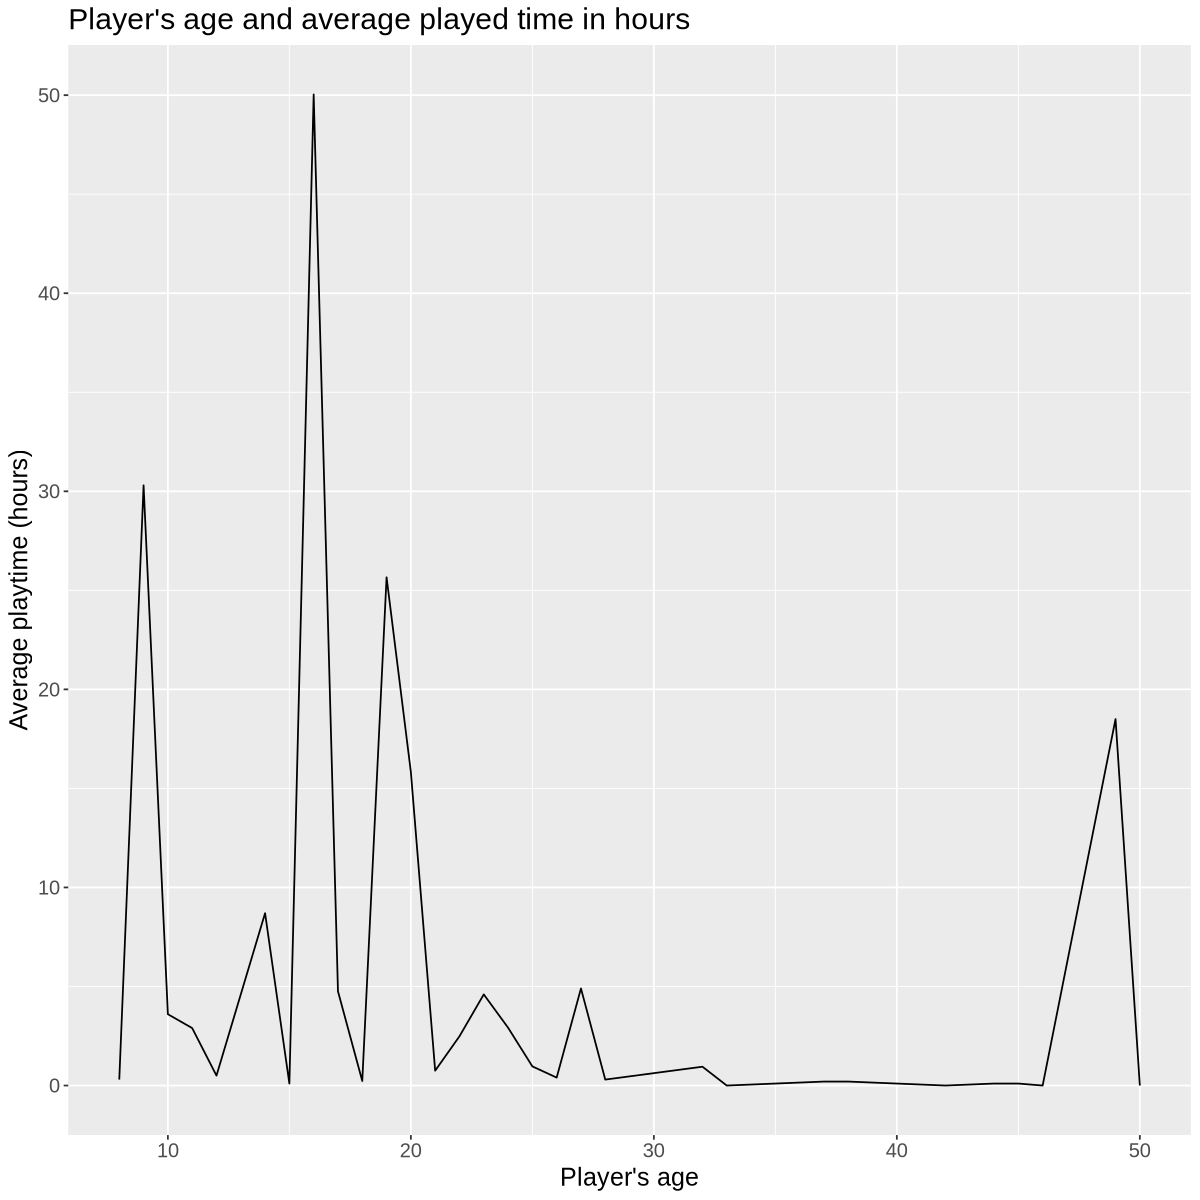

In [55]:
average_playtimes <- players_clean |>
    group_by(age) |>
    summarize(
        average_play = mean(played_hours)
    )
players_plot <- average_playtimes |>
    ggplot(aes(x = age ,y = average_play)) +
    geom_line()+
    labs(x = "Player's age",y = "Average playtime (hours)") +
    ggtitle("Player's age and average played time in hours")+
    theme(text = element_text(size = 15))
players_plot

From the "Player’s Age and Average Play Time (in Hours)" plot, we use a line graph to illustrate the trend between players' ages and their average play time. The data indicates that players aged between 15 and 20 exhibit higher engagement in the game, with a peak of approximately 50 hours around the age of 16. The majority of players fall within the 8 to 20 age range, though there is also a smaller peak around the age of 47. In contrast, individuals aged 30 to 45 display significantly lower play hours. Overall, the plot suggests that age is a key factor influencing players' gaming activity.

### Data Analysis

In [56]:
players_mean <- players_clean |>
        summarize(
            mean_played_hours = mean(played_hours),
            mean_age = mean (age, na.rm = TRUE))

players_mean


mean_played_hours,mean_age
<dbl>,<dbl>
5.904639,20.52062


In [57]:
## split data
players_split <- initial_split(players_clean, prop = 0.5, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

## make model
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors =  tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

## make recipe
players_recipe <- recipe(played_hours ~ age, data = players_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())


In [58]:
## 5 fold cross validation
set.seed(1234)

players_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)

players_workflow <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec)


In [59]:
## calculate rmse 
set.seed(2019)

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))


players_results <- players_workflow |>
  tune_grid(resamples = players_vfold, grid = gridvals) |>
  collect_metrics()

players_results


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,25.2398506,5,11.3885745,Preprocessor1_Model01
1,rsq,standard,0.1184917,5,0.1124162,Preprocessor1_Model01
2,rmse,standard,28.5756605,5,9.6638603,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,rsq,standard,0.01911173,5,0.007508560,Preprocessor1_Model09
10,rmse,standard,19.54041906,5,7.725672403,Preprocessor1_Model10
10,rsq,standard,0.01892550,5,0.004864594,Preprocessor1_Model10


In [60]:
## find best k value
players_min <- players_results |>
   filter(.metric == "rmse") |>
   slice_min(mean, n = 1)

k_min <- players_min |>
         pull(neighbors)

players_min


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,rmse,standard,19.47487,5,7.900812,Preprocessor1_Model07


In [61]:
## rerun model with best k
players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
         set_mode("regression")

players_best_fit <- workflow() |>
         add_recipe(players_recipe) |>
         add_model(players_best_spec) |>
         fit(data = players_training)

players_summary <- players_best_fit |>
          predict(players_testing) |>
          bind_cols(players_testing) |>
          metrics(truth = played_hours, estimate = .pred)

players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,34.509868998
rsq,standard,0.008708196
mae,standard,10.693078056


### Visualisation of analysis

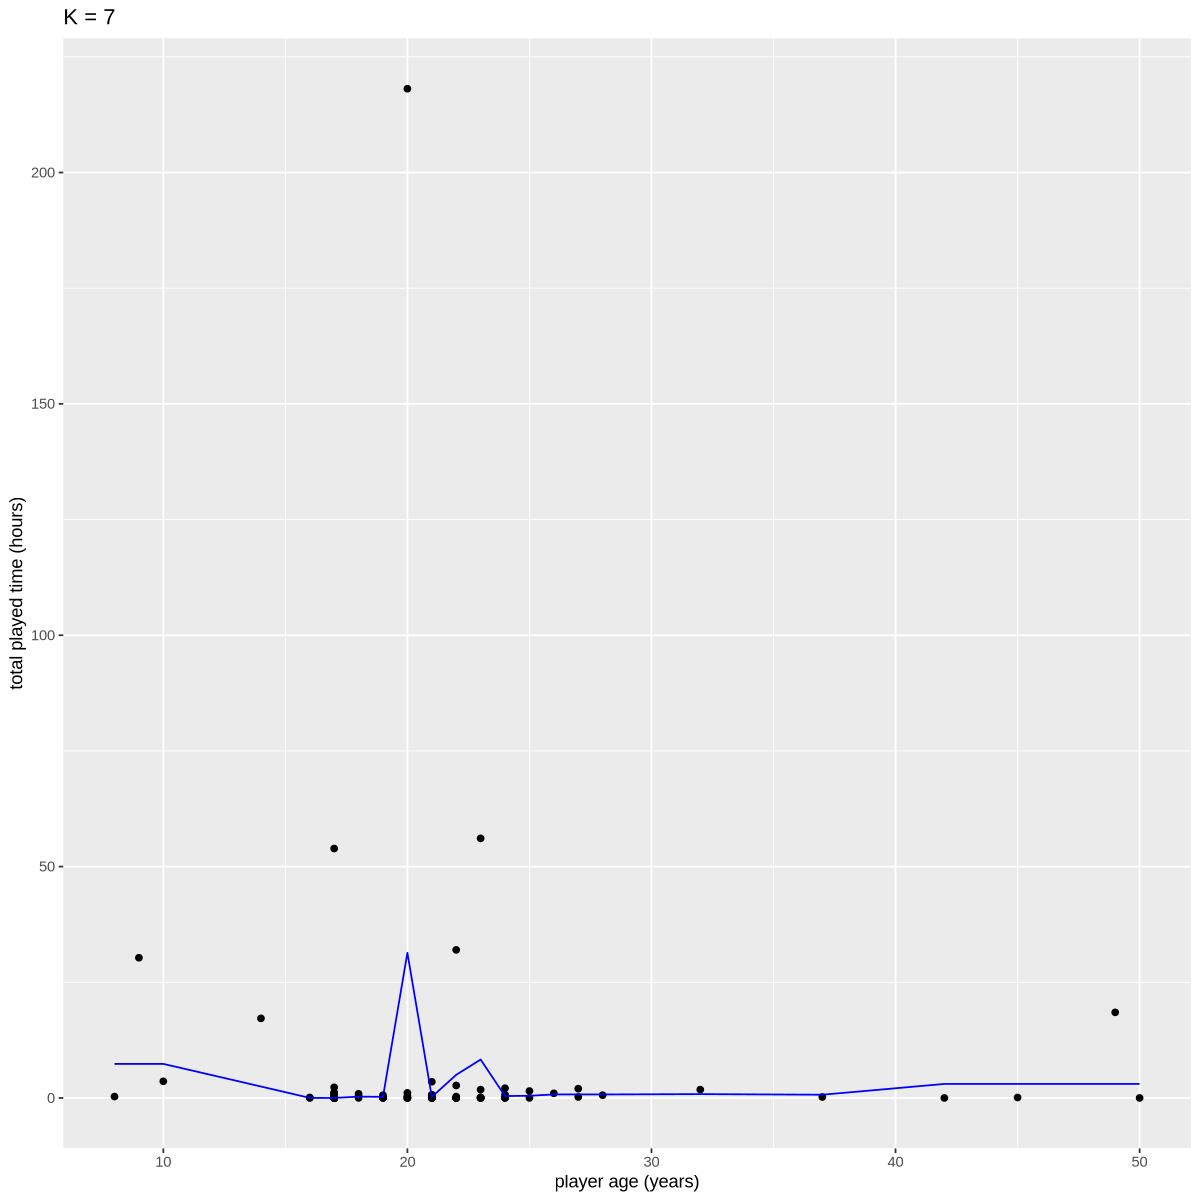

In [62]:
options(repr.plot.width=10, repr.plot.height = 10)

players_preds <- players_best_fit |>
  predict(players_training) |>
  bind_cols(players_training)

players_plot <- ggplot(players_preds, aes(x = age, y = played_hours)) +
  geom_point() +
  geom_line(data = players_preds,
            mapping = aes(x = age, y = .pred),
            color = "blue") +
  xlab("player age (years)") +
  ylab("total played time (hours)") +
  ggtitle(paste0("K = ", k_min))

players_plot


### Discussion:

Model not good...

### References